# Data Science Project Stage 2

### Task 1

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson
import seaborn as sns
import sys

In [211]:
#read data
pop_data = pd.read_csv("..\data\covid_county_population_usafacts.csv")
confirmed_data = pd.read_csv("..\data\covid_confirmed_usafacts.csv")
death_data = pd.read_csv("..\data\covid_deaths_usafacts.csv")
enrichment_data = pd.read_csv("..\data\superCOVID-housingdataframe.csv")

### Part 1

#### Generate weekly statistics for new cases and deaths for Washington.

In [48]:
# Washington Data: 

# Population by county
WA_pop_data = pop_data[pop_data['State'] == "WA"]

# State population
WA_pop_data_sum=WA_pop_data.population.sum()

# Confirmed case and death data 
WA_confirmed_data = confirmed_data[confirmed_data["State"] == "WA"]
WA_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

WA_death_data = death_data[death_data["State"] == "WA"]
WA_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
WA_confirmed_daily = pd.DataFrame(WA_confirmed_data[WA_confirmed_data.columns[0:]].sum()).reset_index()
WA_confirmed_daily.columns=["Date", "Confirmed Cases"]
WA_confirmed_daily["Date"] = pd.to_datetime(WA_confirmed_daily["Date"])
WA_confirmed_daily["Week"] = WA_confirmed_daily["Date"].dt.week

WA_death_daily = pd.DataFrame(WA_death_data[WA_death_data.columns[0:]].sum()).reset_index()
WA_death_daily.columns=["Date", "Deaths"]
WA_death_daily["Date"] = pd.to_datetime(WA_death_daily["Date"])
WA_death_daily["Week"] = WA_death_daily["Date"].dt.week

# Group data weekly
WA_confirmed_weekly = WA_confirmed_daily.groupby("Week").agg(sum)
WA_confirmed_diff=WA_confirmed_weekly.diff()

WA_death_weekly = WA_death_daily.groupby("Week").agg(sum)
WA_death_diff=WA_death_weekly.diff()


# Find Weekly mean, median and mode normalized by population.
WA_confirmed_mean=(WA_confirmed_diff['Confirmed Cases'].mean()/WA_pop_data_sum * 100000).round().astype(int)
WA_confirmed_median=(WA_confirmed_diff['Confirmed Cases'].median()/WA_pop_data_sum * 100000).round().astype(int)
WA_confirmed_mode=(WA_confirmed_diff['Confirmed Cases'].mode()/WA_pop_data_sum * 100000).round().astype(int)

WA_death_mean=(WA_death_diff['Deaths'].mean()/WA_pop_data_sum * 100000).round().astype(int)
WA_death_median=(WA_death_diff['Deaths'].median()/WA_pop_data_sum * 100000).round().astype(int)
WA_death_mode=(WA_death_diff['Deaths'].mode()/WA_pop_data_sum * 100000).round().astype(int)


#### Compare state populations

In [4]:
pop_data_sum = pop_data.groupby('State').population.sum().sort_values(ascending=False)
pop_data_sum.head()

State
CA    39512223
TX    28995881
FL    21477737
NY    19453561
PA    12801989
Name: population, dtype: int64

#### Washington new cases mean, median and mode  normalized by population (per 100000)

In [5]:
print("Washington Mean:   ", WA_confirmed_mean)
print("Washington Median: ", WA_confirmed_median)
print("Washington Mode:   ", WA_confirmed_mode[0])

Washington Mean:    232
Washington Median:  233
Washington Mode:    0


#### Washington deaths mean, median and mode normalized by population (per 100000)

In [6]:
print("Washington Mean:   ", WA_death_mean)
print("Washington Median: ", WA_death_median)
print("Washington Mode:   ", WA_death_mode[0])

Washington Mean:    5
Washington Median:  5
Washington Mode:    0


### Part 2

#### Generate weekly statistics for new cases and deaths for Massachusetts

In [7]:
# Massachusetts data

# Population by county
MA_pop_data = pop_data[pop_data['State'] == "MA"]

# State population
MA_pop_data_sum=MA_pop_data.population.sum()

# Confirmed case and death data 
MA_confirmed_data = confirmed_data[confirmed_data["State"] == "MA"]
MA_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

MA_death_data = death_data[death_data["State"] == "MA"]
MA_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
MA_confirmed_daily = pd.DataFrame(MA_confirmed_data[MA_confirmed_data.columns[0:]].sum()).reset_index()
MA_confirmed_daily.columns=["Date", "Confirmed Cases"]
MA_confirmed_daily["Date"] = pd.to_datetime(MA_confirmed_daily["Date"])
MA_confirmed_daily["Week"] = MA_confirmed_daily["Date"].dt.week.fillna(0)


MA_death_daily = pd.DataFrame(MA_death_data[MA_death_data.columns[0:]].sum()).reset_index()
MA_death_daily.columns=["Date", "Deaths"]
MA_death_daily["Date"] = pd.to_datetime(MA_death_daily["Date"])
MA_death_daily["Week"] = MA_death_daily["Date"].dt.week

# Group data weekly
MA_confirmed_weekly = MA_confirmed_daily.groupby("Week").agg(sum)
MA_confirmed_diff=MA_confirmed_weekly.diff()

MA_death_weekly = MA_death_daily.groupby("Week").agg(sum)
MA_death_diff=MA_death_weekly.diff()


# Find Weekly mean, median and mode normalized by population.
MA_confirmed_mean=(MA_confirmed_diff['Confirmed Cases'].mean()/MA_pop_data_sum * 100000).round().astype(int)
MA_confirmed_median=(MA_confirmed_diff['Confirmed Cases'].median()/MA_pop_data_sum * 100000).round().astype(int)
MA_confirmed_mode=(MA_confirmed_diff['Confirmed Cases'].mode()/MA_pop_data_sum * 100000).round().astype(int)

MA_death_mean=(MA_death_diff['Deaths'].mean()/MA_pop_data_sum * 100000).round().astype(int)
MA_death_median=(MA_death_diff['Deaths'].median()/MA_pop_data_sum * 100000).round().astype(int)
MA_death_mode=(MA_death_diff['Deaths'].mode()/MA_pop_data_sum * 100000).round().astype(int)



#### Generate weekly statistics for new cases and deaths for New Jersey

In [8]:
# New Jersey Data: 

# Population by county
NJ_pop_data = pop_data[pop_data['State'] == "NJ"]

# State population
NJ_pop_data_sum=NJ_pop_data.population.sum()

# Confirmed case and death data 
NJ_confirmed_data = confirmed_data[confirmed_data["State"] == "NJ"]
NJ_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

NJ_death_data = death_data[death_data["State"] == "NJ"]
NJ_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
NJ_daily = pd.DataFrame(NJ_confirmed_data[NJ_confirmed_data.columns[0:]].sum()).reset_index()
NJ_daily.columns=["Date", "Confirmed Cases"]
NJ_daily["Date"] = pd.to_datetime(NJ_daily["Date"])
NJ_daily["Week"] = NJ_daily["Date"].dt.week

NJ_death_daily = pd.DataFrame(NJ_death_data[NJ_death_data.columns[0:]].sum()).reset_index()
NJ_death_daily.columns=["Date", "Deaths"]
NJ_death_daily["Date"] = pd.to_datetime(NJ_death_daily["Date"])
NJ_death_daily["Week"] = NJ_death_daily["Date"].dt.week

# Group data weekly
NJ_weekly = NJ_daily.groupby("Week").agg(sum)
NJ_diff=NJ_weekly.diff()

NJ_death_weekly = NJ_death_daily.groupby("Week").agg(sum)
NJ_death_diff=NJ_death_weekly.diff()


# Find Weekly mean, median and mode normalized by population.
NJ_confirmed_mean=(NJ_diff['Confirmed Cases'].mean()/NJ_pop_data_sum * 100000).round().astype(int)
NJ_confirmed_median=(NJ_diff['Confirmed Cases'].median()/NJ_pop_data_sum * 100000).round().astype(int)
NJ_confirmed_mode=(NJ_diff['Confirmed Cases'].mode()/NJ_pop_data_sum * 100000).round().astype(int)

NJ_death_mean=(NJ_death_diff['Deaths'].mean()/NJ_pop_data_sum * 100000).round().astype(int)
NJ_death_median=(NJ_death_diff['Deaths'].median()/NJ_pop_data_sum * 100000).round().astype(int)
NJ_death_mode=(NJ_death_diff['Deaths'].mode()/NJ_pop_data_sum * 100000).round().astype(int)

#### Generate weekly statistics for new cases and deaths for Virginia

In [9]:
# Virginia Data: 

# Population by county
VA_pop_data = pop_data[pop_data['State'] == "VA"]

# State population
VA_pop_data_sum=VA_pop_data.population.sum()

# Confirmed case and death data 
VA_confirmed_data = confirmed_data[confirmed_data["State"] == "VA"]
VA_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

VA_death_data = death_data[death_data["State"] == "VA"]
VA_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
VA_daily = pd.DataFrame(VA_confirmed_data[VA_confirmed_data.columns[0:]].sum()).reset_index()
VA_daily.columns=["Date", "Confirmed Cases"]
VA_daily["Date"] = pd.to_datetime(NJ_daily["Date"])
VA_daily["Week"] = VA_daily["Date"].dt.week

VA_death_daily = pd.DataFrame(VA_death_data[VA_death_data.columns[0:]].sum()).reset_index()
VA_death_daily.columns=["Date", "Deaths"]
VA_death_daily["Date"] = pd.to_datetime(VA_death_daily["Date"])
VA_death_daily["Week"] = VA_death_daily["Date"].dt.week

# Group data weekly
VA_weekly = VA_daily.groupby('Week').agg(sum)
VA_diff=VA_weekly.diff()

VA_death_weekly = VA_death_daily.groupby("Week").agg(sum)
VA_death_diff=VA_death_weekly.diff()

# Find Weekly mean, median and mode (normalized for population per 100000)
VA_confirmed_mean=(VA_diff['Confirmed Cases'].mean()/VA_pop_data_sum * 100000).round().astype(int)
VA_confirmed_median=(VA_diff['Confirmed Cases'].median()/VA_pop_data_sum * 100000).round().astype(int)
VA_confirmed_mode=(VA_diff['Confirmed Cases'].mode()/VA_pop_data_sum * 100000).round().astype(int)

VA_death_mean=(VA_death_diff['Deaths'].mean()/VA_pop_data_sum * 100000).round().astype(int)
VA_death_median=(VA_death_diff['Deaths'].median()/VA_pop_data_sum * 100000).round().astype(int)
VA_death_mode=(VA_death_diff['Deaths'].mode()/VA_pop_data_sum * 100000).round().astype(int)

#### Generate weekly statistics for new cases and deaths for​ Arizona

In [10]:
# Arizona Data: 

# Population by county
AZ_pop_data = pop_data[pop_data['State'] == "AZ"]

# State population
AZ_pop_data_sum=AZ_pop_data.population.sum()

# Confirmed case and death data 
AZ_confirmed_data = confirmed_data[confirmed_data["State"] == "AZ"]
AZ_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

AZ_death_data = death_data[death_data["State"] == "AZ"]
AZ_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
AZ_daily = pd.DataFrame(AZ_confirmed_data[AZ_confirmed_data.columns[0:]].sum()).reset_index()
AZ_daily.columns=["Date", "Confirmed Cases"]
AZ_daily["Date"] = pd.to_datetime(AZ_daily["Date"])
AZ_daily["Week"] = AZ_daily["Date"].dt.week

AZ_death_daily = pd.DataFrame(AZ_death_data[VA_death_data.columns[0:]].sum()).reset_index()
AZ_death_daily.columns=["Date", "Deaths"]
AZ_death_daily["Date"] = pd.to_datetime(AZ_death_daily["Date"])
AZ_death_daily["Week"] = AZ_death_daily["Date"].dt.week

# Group data weekly
AZ_weekly = AZ_daily.groupby("Week").agg(sum)
AZ_diff=AZ_weekly.diff()

AZ_death_weekly = AZ_death_daily.groupby("Week").agg(sum)
AZ_death_diff=AZ_death_weekly.diff()

# Find Weekly mean, median and mode normalized by population.
AZ_confirmed_mean=(AZ_diff['Confirmed Cases'].mean()/AZ_pop_data_sum * 100000).round().astype(int)
AZ_confirmed_median=(AZ_diff['Confirmed Cases'].median()/AZ_pop_data_sum * 100000).round().astype(int)
AZ_confirmed_mode=(AZ_diff['Confirmed Cases'].mode()/AZ_pop_data_sum * 100000).round().astype(int)

AZ_death_mean=(AZ_death_diff['Deaths'].mean()/AZ_pop_data_sum * 100000).round().astype(int)
AZ_death_median=(AZ_death_diff['Deaths'].median()/AZ_pop_data_sum * 100000).round().astype(int)
AZ_death_mode=(AZ_death_diff['Deaths'].mode()/AZ_pop_data_sum * 100000).round().astype(int)

#### Generate weekly statistics for new cases and deaths for Tennessee

In [11]:
# Tennesse Data: 

# Population by county
TN_pop_data = pop_data[pop_data['State'] == "TN"]

# State population
TN_pop_data_sum=TN_pop_data.population.sum()

# Confirmed case data 
TN_confirmed_data = confirmed_data[confirmed_data["State"] == "TN"]
TN_confirmed_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

TN_death_data = death_data[death_data["State"] == "TN"]
TN_death_data.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1, inplace=True)

# Rearrange data into a useful form
TN_daily = pd.DataFrame(TN_confirmed_data[TN_confirmed_data.columns[0:]].sum()).reset_index()
TN_daily.columns=["Date", "Confirmed Cases"]
TN_daily["Date"] = pd.to_datetime(TN_daily["Date"])
TN_daily["Week"] = TN_daily["Date"].dt.week

TN_death_daily = pd.DataFrame(TN_death_data[TN_death_data.columns[0:]].sum()).reset_index()
TN_death_daily.columns=["Date", "Deaths"]
TN_death_daily["Date"] = pd.to_datetime(TN_death_daily["Date"])
TN_death_daily["Week"] = TN_death_daily["Date"].dt.week

# Group data weekly
TN_weekly = TN_daily.groupby("Week").agg(sum)
TN_diff=TN_weekly.diff()

TN_death_weekly = TN_death_daily.groupby("Week").agg(sum)
TN_death_diff=TN_death_weekly.diff()

# Find Weekly mean, median and mode normalized by population.
TN_confirmed_mean=(TN_diff['Confirmed Cases'].mean()/TN_pop_data_sum * 100000).round().astype(int)
TN_confirmed_median=(TN_diff['Confirmed Cases'].median()/TN_pop_data_sum * 100000).round().astype(int)
TN_confirmed_mode=(TN_diff['Confirmed Cases'].mode()/TN_pop_data_sum * 100000).round().astype(int)

TN_death_mean=(TN_death_diff['Deaths'].mean()/TN_pop_data_sum * 100000).round().astype(int)
TN_death_median=(TN_death_diff['Deaths'].median()/TN_pop_data_sum * 100000).round().astype(int)
TN_death_mode=(TN_death_diff['Deaths'].mode()/TN_pop_data_sum * 100000).round().astype(int)

### Comparison of States with Similar Populations

In [12]:
data = [['Washington', WA_pop_data_sum, WA_confirmed_mean, WA_confirmed_median, WA_confirmed_mode[0]], 
        ['Massachusetts', MA_pop_data_sum, MA_confirmed_mean, MA_confirmed_median, MA_confirmed_mode[0]], 
        ['New Jersey', NJ_pop_data_sum, NJ_confirmed_mean, NJ_confirmed_median, NJ_confirmed_mode[0]], 
        ['Virginia', VA_pop_data_sum, VA_confirmed_mean, VA_confirmed_median, VA_confirmed_mode[0]],
        ['Arizona', AZ_pop_data_sum, AZ_confirmed_mean, AZ_confirmed_median, AZ_confirmed_mode[0]], 
        ['Tennessee', TN_pop_data_sum, TN_confirmed_mean, TN_confirmed_median, TN_confirmed_mode[0]]]
comparison_confirmed = pd.DataFrame(data, columns = ['State', 'Population', 'Mean', 'Median', 'Mode'])
print("State Comparision Normalized by Population (per 100,000) \n")
print(comparison_confirmed)

State Comparision Normalized by Population (per 100,000) 

           State  Population  Mean  Median  Mode
0     Washington     7614893   232     233     0
1  Massachusetts     6892503   398     241     0
2     New Jersey     8882190   450     210     0
3       Virginia     8535519   352     427     0
4        Arizona     7278717   579     318     0
5      Tennessee     6829174   600     347     0


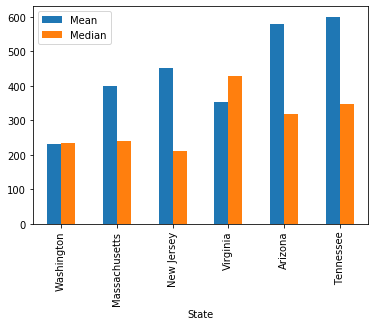

In [13]:
comparison_confirmed.plot.bar(x='State', y={'Mean', 'Median'})

In [14]:
data = [['Washington', WA_pop_data_sum, WA_death_mean, WA_death_median, WA_death_mode[0]],
        ['Massachusetts', MA_pop_data_sum, MA_death_mean, MA_death_median, MA_death_mode[0]], 
        ['New Jersey', NJ_pop_data_sum, NJ_death_mean, NJ_death_median, NJ_death_mode[0]], 
        ['Virginia', VA_pop_data_sum, VA_death_mean, VA_death_median, VA_death_mode[0]],
        ['Arizona', AZ_pop_data_sum, AZ_death_mean, AZ_death_median, AZ_death_mode[0]], 
        ['Tennessee', TN_pop_data_sum, TN_death_mean, TN_death_median, TN_death_mode[0]]]
comparison_death = pd.DataFrame(data, columns = ['State', 'Population', 'Mean', 'Median', 'Mode'])
print("State Comparision Normalized by Population (per 100,000) \n")
print(comparison_death)

State Comparision Normalized by Population (per 100,000) 

           State  Population  Mean  Median  Mode
0     Washington     7614893     5       5     0
1  Massachusetts     6892503    26      11     0
2     New Jersey     8882190    34       4     0
3       Virginia     8535519     7       7     0
4        Arizona     7278717    15      13     0
5      Tennessee     6829174     8       5     0


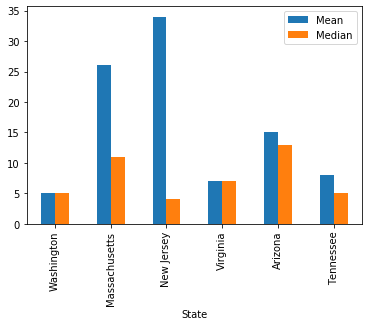

In [15]:
comparison_death.plot.bar(x='State', y={'Mean', 'Median'})

### Part 3

### Counties with high case and death rates Washington 

#### Counties with highest total cases (normanlized by population)

In [50]:
# Get county data
WA_confirmed_data = confirmed_data[confirmed_data["State"] == "WA"]
WA_confirmed_data.drop(['countyFIPS', 'State', 'stateFIPS'], axis=1, inplace=True)

county_confirmed_total=WA_confirmed_data.filter(['County Name', '10/18/20'])
county_confirmed_total.rename(columns={'10/18/20': 'Total Cases'}, inplace=True)

# Merge with population data and sort by Total Cases
county_pop_confirmed = pd.merge(WA_pop_data, county_confirmed_total)
county_pop_confirmed = county_pop_confirmed[county_pop_confirmed['population'] != 0].dropna()
county_pop_confirmed.drop(['countyFIPS', 'State'], axis = 1, inplace = True)
county_pop_confirmed.sort_values('Total Cases', ascending=False).set_index('County Name')
county_pop_confirmed['Cases per 10000'] = (county_pop_confirmed['Total Cases']/county_pop_confirmed['population'] * 10000).round()
county_pop_confirmed.sort_values('Cases per 10000', ascending=False).head(5)

,County Name,population,Total Cases,Cases per 10000
11,Franklin County,95222,4637,487.0
39,Yakima County,250873,11708,467.0
1,Adams County,19983,908,454.0
38,Whitman County,50104,1670,333.0
13,Grant County,97733,3257,333.0


#### Counties with highest total deaths (normanlized by population)

In [17]:
# Get county data
WA_death_data = death_data[confirmed_data["State"] == "WA"]
WA_death_data.drop(['countyFIPS', 'State', 'stateFIPS'], axis=1, inplace=True)

county_death_total=WA_death_data.filter(['County Name', '10/18/20'])
county_death_total.rename(columns={'10/18/20': 'Total Deaths'}, inplace=True)

# Merge with population data and sort by Total Cases
county_pop_death = pd.merge(WA_pop_data, county_death_total)
county_pop_death = county_pop_death[county_pop_death['population'] != 0].dropna()
county_pop_death.drop(['countyFIPS', 'State'], axis = 1, inplace = True)
county_pop_death.sort_values('Total Deaths', ascending=False).set_index('County Name')
county_pop_death['Deaths per 10000'] = (county_pop_death['Total Deaths']/county_pop_death['population'] * 10000).round(0)
county_pop_death.sort_values('Deaths per 10000', ascending=False).head(5)

,County Name,population,Total Deaths,Deaths per 10000
39,Yakima County,250873,267,11.0
11,Franklin County,95222,67,7.0
3,Benton County,204390,132,6.0
19,Kittitas County,47935,22,5.0
1,Adams County,19983,10,5.0


### Part 4

#### Plot daily data for Washington 

In [18]:
# Daily Confirmed Cases normalized by population (per 10000)

WA_confirmed_daily = pd.DataFrame(WA_confirmed_data[WA_confirmed_data.columns[0:]].sum()).reset_index()
WA_confirmed_daily.columns=["Date", "Confirmed Cases"]
WA_confirmed_daily = WA_confirmed_daily.iloc[1:]
WA_confirmed_daily
WA_confirmed_daily['Cases per 100000'] = (WA_confirmed_daily['Confirmed Cases']/WA_pop_data_sum * 100000)
WA_confirmed_daily_norm=WA_confirmed_daily.set_index('Date')


# Daily Deaths normalized by population (per 10000)

WA_death_daily = pd.DataFrame(WA_death_data[WA_death_data.columns[0:]].sum()).reset_index()
WA_death_daily.columns=["Date", "Deaths"]
WA_death_daily = WA_death_daily.iloc[1:]
WA_death_daily
WA_death_daily['Cases per 100000'] = (WA_death_daily['Deaths']/WA_pop_data_sum * 100000)
WA_death_daily.set_index('Date')
WA_death_daily_norm=WA_death_daily.set_index('Date')


# Daily new cases 
WA_confirmed_daily_norm['New Cases'] = WA_confirmed_daily_norm['Cases per 100000'].diff()



#### Washington Confirmed Cases normalized by population

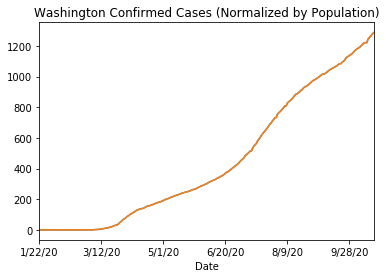

In [52]:
WA_confirmed_daily_norm['Cases per 100000'].plot(title='Washington Confirmed Cases (Normalized by Population)').get_figure().savefig('WA_confirmed_norm.png')
WA_confirmed_daily_norm['Cases per 100000'].plot(title='Washington Confirmed Cases (Normalized by Population)')

#### Washington Deaths normalized by population

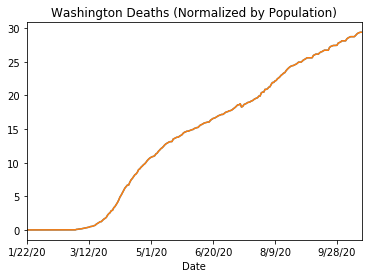

In [53]:
WA_death_daily_norm['Cases per 100000'].plot(title='Washington Deaths (Normalized by Population)').get_figure().savefig('WA_death_norm.png')
WA_death_daily_norm['Cases per 100000'].plot(title='Washington Deaths (Normalized by Population)')

#### Washington new cases

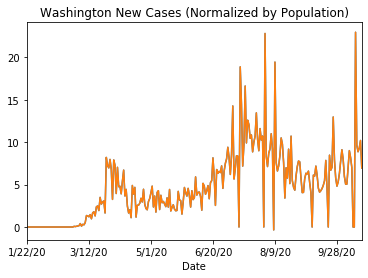

In [54]:
WA_confirmed_daily_norm['New Cases'].plot(title='Washington New Cases (Normalized by Population)').get_figure().savefig('WA_new_norm.png')
WA_confirmed_daily_norm['New Cases'].plot(title='Washington New Cases (Normalized by Population)')

#### Plot daily data for the top 5 counties for Confirmed Cases per 10000

### Yakima County

In [22]:
Yakima_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Yakima County']
Yakima_pop=Yakima_pop_data['population'].sum()
Yakima_pop

250873

In [23]:
# Daily Confirmed Cases normalized by population (per 10000)


Yakima_confirmed_data=WA_confirmed_data[WA_confirmed_data['County Name'] == 'Yakima County']
Yakima_confirmed_daily = pd.DataFrame(Yakima_confirmed_data[Yakima_confirmed_data.columns[0:]].sum()).reset_index()
Yakima_confirmed_daily.columns=['Date', 'Confirmed Cases']
Yakima_confirmed_daily = Yakima_confirmed_daily.iloc[1:]
Yakima_confirmed_daily.set_index('Date')
Yakima_confirmed_daily['Cases per 10000'] = (Yakima_confirmed_daily['Confirmed Cases']/Yakima_pop * 10000).astype(int)
Yakima_confirmed_daily_norm=Yakima_confirmed_daily.set_index('Date')

# Daily Deaths normalized by population (per 10000)

Yakima_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Yakima County']
Yakima_death_data=WA_death_data[WA_death_data['County Name'] == 'Yakima County']
Yakima_death_daily = pd.DataFrame(Yakima_death_data[Yakima_death_data.columns[0:]].sum()).reset_index()
Yakima_death_daily.columns=['Date', 'Confirmed Cases']
Yakima_death_daily = Yakima_death_daily.iloc[1:]
Yakima_death_daily.set_index('Date')
Yakima_death_daily['Cases per 10000'] = (Yakima_death_daily['Confirmed Cases']/Yakima_pop * 10000).astype(int)
Yakima_death_daily_norm=Yakima_death_daily.set_index('Date')

# Daily new cases 
Yakima_confirmed_daily_norm['New Cases'] = Yakima_confirmed_daily_norm['Cases per 10000'].diff()


#### Yakima Confirmed Cases normalized by population (per 10000)

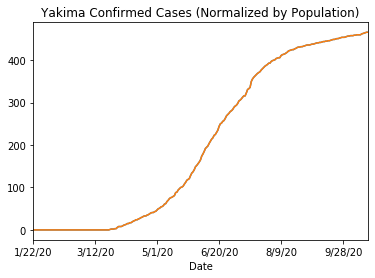

In [55]:
Yakima_confirmed_daily_norm['Cases per 10000'].plot(title='Yakima Confirmed Cases (Normalized by Population)').get_figure().savefig('Yakima_confirmed_norm.png')
Yakima_confirmed_daily_norm['Cases per 10000'].plot(title='Yakima Confirmed Cases (Normalized by Population)')

#### Yakima Deaths normalized by population

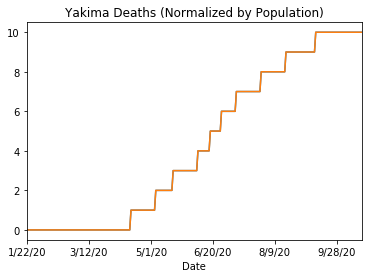

In [56]:
Yakima_death_daily_norm['Cases per 10000'].plot(title='Yakima Deaths (Normalized by Population)').get_figure().savefig('Yakima_death_norm')
Yakima_death_daily_norm['Cases per 10000'].plot(title='Yakima Deaths (Normalized by Population)')

#### Yakima New Cases normalized by population

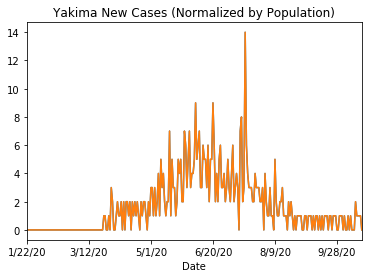

In [57]:
Yakima_confirmed_daily_norm['New Cases'].plot(title='Yakima New Cases (Normalized by Population)').get_figure().savefig('Yakima_new_norm.png')
Yakima_confirmed_daily_norm['New Cases'].plot(title='Yakima New Cases (Normalized by Population)')

### Franklin County 

In [27]:
Franklin_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Franklin County']
Franklin_pop=Franklin_pop_data['population'].sum()
Franklin_pop

95222

In [28]:
# Daily Confirmed Cases normalized by population (per 10000)

Franklin_confirmed_data=WA_confirmed_data[WA_confirmed_data['County Name'] == 'Franklin County']
Franklin_confirmed_daily = pd.DataFrame(Franklin_confirmed_data[Franklin_confirmed_data.columns[0:]].sum()).reset_index()
Franklin_confirmed_daily.columns=['Date', 'Confirmed Cases']
Franklin_confirmed_daily = Franklin_confirmed_daily.iloc[1:]
Franklin_confirmed_daily.set_index('Date')
Franklin_confirmed_daily['Cases per 10000'] = (Franklin_confirmed_daily['Confirmed Cases']/Franklin_pop * 10000).astype(int)
Franklin_confirmed_daily_norm=Franklin_confirmed_daily.set_index('Date')

# Daily Deaths normalized by population (per 10000)

Franklin_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Franklin County']
Franklin_death_data=WA_death_data[WA_death_data['County Name'] == 'Franklin County']
Franklin_death_daily = pd.DataFrame(Franklin_death_data[Franklin_death_data.columns[0:]].sum()).reset_index()
Franklin_death_daily.columns=['Date', 'Confirmed Cases']
Franklin_death_daily = Franklin_death_daily.iloc[1:]
Franklin_death_daily.set_index('Date')
Franklin_death_daily['Cases per 10000'] = (Franklin_death_daily['Confirmed Cases']/Franklin_pop * 10000).astype(int)
Franklin_death_daily_norm=Franklin_death_daily.set_index('Date')

# Daily new cases 
Franklin_confirmed_daily_norm['New Cases'] = Franklin_confirmed_daily_norm['Cases per 10000'].diff()


#### Franklin Confirmed Cases normalized by population (per 10000)

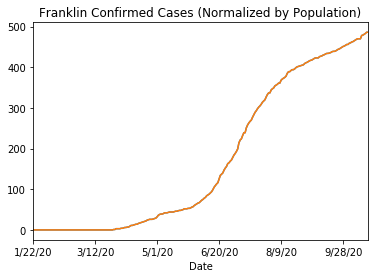

In [58]:
Franklin_confirmed_daily_norm['Cases per 10000'].plot(title='Franklin Confirmed Cases (Normalized by Population)').get_figure().savefig('Franklin_confirmed_norm.png')
Franklin_confirmed_daily_norm['Cases per 10000'].plot(title='Franklin Confirmed Cases (Normalized by Population)')

#### Franklin Deaths normalized by population (per 10000)

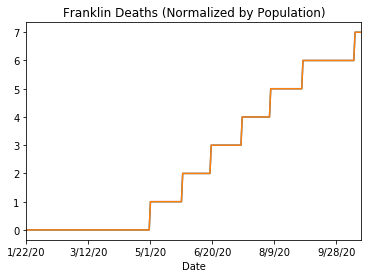

In [59]:
Franklin_death_daily_norm['Cases per 10000'].plot(title='Franklin Deaths (Normalized by Population)').get_figure().savefig('Franklin_death_norm')
Franklin_death_daily_norm['Cases per 10000'].plot(title='Franklin Deaths (Normalized by Population)')

#### Franklin New Cases normalized by population

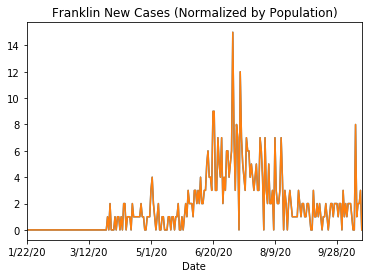

In [60]:
Franklin_confirmed_daily_norm['New Cases'].plot(title='Franklin New Cases (Normalized by Population)').get_figure().savefig('Franklin_new_norm.png')
Franklin_confirmed_daily_norm['New Cases'].plot(title='Franklin New Cases (Normalized by Population)')

### Adams County

In [32]:
Adams_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Adams County']
Adams_pop=Adams_pop_data['population'].sum()
Adams_pop

19983

In [33]:
# Daily Confirmed Cases normalized by population (per 10000)

Adams_confirmed_data=WA_confirmed_data[WA_confirmed_data['County Name'] == 'Adams County']
Adams_confirmed_daily = pd.DataFrame(Adams_confirmed_data[Adams_confirmed_data.columns[0:]].sum()).reset_index()
Adams_confirmed_daily.columns=['Date', 'Confirmed Cases']
Adams_confirmed_daily = Adams_confirmed_daily.iloc[1:]
Adams_confirmed_daily.set_index('Date')
Adams_confirmed_daily['Cases per 10000'] = (Adams_confirmed_daily['Confirmed Cases']/Adams_pop * 10000).astype(int)
Adams_confirmed_daily_norm=Adams_confirmed_daily.set_index('Date')

# Daily Deaths normalized by population (per 10000)

Adams_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Adams County']
Adams_death_data=WA_death_data[WA_death_data['County Name'] == 'Adams County']
Adams_death_daily = pd.DataFrame(Adams_death_data[Adams_death_data.columns[0:]].sum()).reset_index()
Adams_death_daily.columns=['Date', 'Confirmed Cases']
Adams_death_daily = Adams_death_daily.iloc[1:]
Adams_death_daily.set_index('Date')
Adams_death_daily['Cases per 10000'] = (Adams_death_daily['Confirmed Cases']/Adams_pop * 10000).astype(int)
Adams_death_daily_norm=Adams_death_daily.set_index('Date')

# Daily new cases 
Adams_confirmed_daily_norm['New Cases'] = Adams_confirmed_daily_norm['Cases per 10000'].diff()


#### Adams Confirmed Cases normalized by population (per 10000)

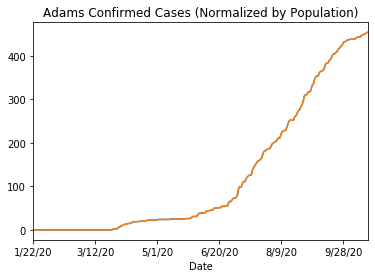

In [61]:
Adams_confirmed_daily_norm['Cases per 10000'].plot(title='Adams Confirmed Cases (Normalized by Population)').get_figure().savefig('Adams_confirmed_norm.png')
Adams_confirmed_daily_norm['Cases per 10000'].plot(title='Adams Confirmed Cases (Normalized by Population)')

#### Adams Deaths normalized by population (per 10000)

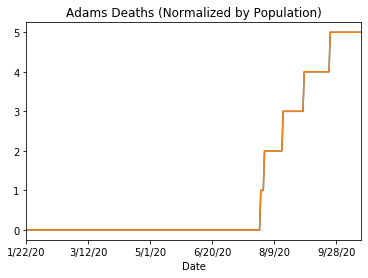

In [62]:
Adams_death_daily_norm['Cases per 10000'].plot(title='Adams Deaths (Normalized by Population)').get_figure().savefig('Adams_death_norm')
Adams_death_daily_norm['Cases per 10000'].plot(title='Adams Deaths (Normalized by Population)')

#### Adams New Cases normalized by population

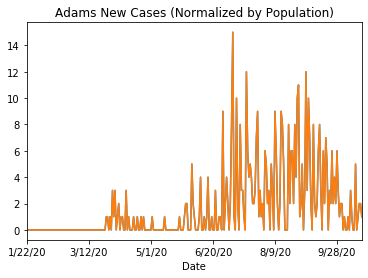

In [63]:
Adams_confirmed_daily_norm['New Cases'].plot(title='Adams New Cases (Normalized by Population)').get_figure().savefig('Adams_new_norm.png')
Adams_confirmed_daily_norm['New Cases'].plot(title='Adams New Cases (Normalized by Population)')

### Whitman County

In [37]:
Whitman_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Whitman County']
Whitman_pop=Whitman_pop_data['population'].sum()
Whitman_pop

50104

In [38]:
# Daily Confirmed Cases normalized by population (per 10000)

Whitman_confirmed_data=WA_confirmed_data[WA_confirmed_data['County Name'] == 'Whitman County']
Whitman_confirmed_daily = pd.DataFrame(Whitman_confirmed_data[Whitman_confirmed_data.columns[0:]].sum()).reset_index()
Whitman_confirmed_daily.columns=['Date', 'Confirmed Cases']
Whitman_confirmed_daily = Whitman_confirmed_daily.iloc[1:]
Whitman_confirmed_daily.set_index('Date')
Whitman_confirmed_daily['Cases per 10000'] = (Whitman_confirmed_daily['Confirmed Cases']/Whitman_pop * 10000).astype(int)
Whitman_confirmed_daily_norm=Whitman_confirmed_daily.set_index('Date')

# Daily Deaths normalized by population (per 10000)

Whitman_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Whitman County']
Whitman_death_data=WA_death_data[WA_death_data['County Name'] == 'Whitman County']
Whitman_death_daily = pd.DataFrame(Whitman_death_data[Whitman_death_data.columns[0:]].sum()).reset_index()
Whitman_death_daily.columns=['Date', 'Confirmed Cases']
Whitman_death_daily = Whitman_death_daily.iloc[1:]
Whitman_death_daily.set_index('Date')
Whitman_death_daily['Cases per 10000'] = (Whitman_death_daily['Confirmed Cases']/Whitman_pop * 10000).astype(int)
Whitman_death_daily_norm=Whitman_death_daily.set_index('Date')

# Daily new cases 
Whitman_confirmed_daily_norm['New Cases'] = Whitman_confirmed_daily_norm['Cases per 10000'].diff()


#### Whitman Confirmed Cases normalized by population (per 10000)

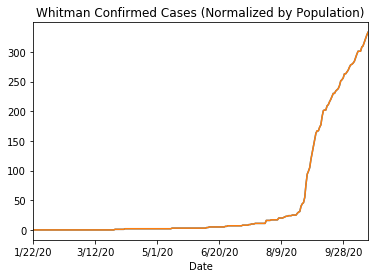

In [64]:
Whitman_confirmed_daily_norm['Cases per 10000'].plot(title='Whitman Confirmed Cases (Normalized by Population)').get_figure().savefig('Whitman_confirmed_norm.png')
Whitman_confirmed_daily_norm['Cases per 10000'].plot(title='Whitman Confirmed Cases (Normalized by Population)')

#### Whitman Deaths normalized by population (per 10000)

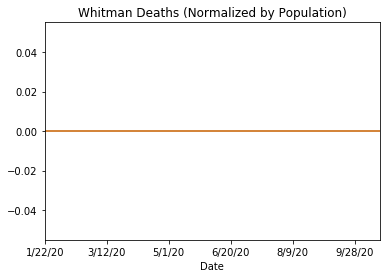

In [65]:
Whitman_death_daily_norm['Cases per 10000'].plot(title='Whitman Deaths (Normalized by Population)').get_figure().savefig('Whitman_death_norm')
Whitman_death_daily_norm['Cases per 10000'].plot(title='Whitman Deaths (Normalized by Population)')

#### Whitman New Cases normalized by population

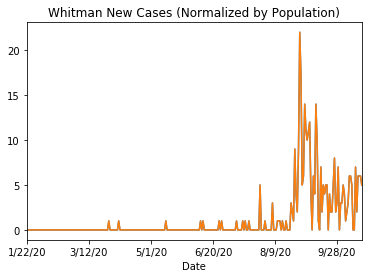

In [66]:
Whitman_confirmed_daily_norm['New Cases'].plot(title='Whitman New Cases (Normalized by Population)').get_figure().savefig('Whitman_new_norm.png')
Whitman_confirmed_daily_norm['New Cases'].plot(title='Whitman New Cases (Normalized by Population)')

### Grant County

In [42]:
Grant_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Grant County']
Grant_pop=Grant_pop_data['population'].sum()
Grant_pop

97733

In [43]:
# Daily Confirmed Cases normalized by population (per 10000)

Grant_confirmed_data=WA_confirmed_data[WA_confirmed_data['County Name'] == 'Grant County']
Grant_confirmed_daily = pd.DataFrame(Grant_confirmed_data[Grant_confirmed_data.columns[0:]].sum()).reset_index()
Grant_confirmed_daily.columns=['Date', 'Confirmed Cases']
Grant_confirmed_daily = Grant_confirmed_daily.iloc[1:]
Grant_confirmed_daily.set_index('Date')
Grant_confirmed_daily['Cases per 10000'] = (Grant_confirmed_daily['Confirmed Cases']/Grant_pop * 10000).astype(int)
Grant_confirmed_daily_norm=Whitman_confirmed_daily.set_index('Date')

# Daily Deaths normalized by population (per 10000)

Grant_pop_data=WA_pop_data[WA_pop_data['County Name'] == 'Grant County']
Grant_death_data=WA_death_data[WA_death_data['County Name'] == 'Grant County']
Grant_death_daily = pd.DataFrame(Whitman_death_data[Whitman_death_data.columns[0:]].sum()).reset_index()
Grant_death_daily.columns=['Date', 'Confirmed Cases']
Grant_death_daily = Grant_death_daily.iloc[1:]
Grant_death_daily.set_index('Date')
Grant_death_daily['Cases per 10000'] = (Grant_death_daily['Confirmed Cases']/Grant_pop * 10000).astype(int)
Grant_death_daily_norm=Whitman_death_daily.set_index('Date')

# Daily new cases 
Grant_confirmed_daily_norm['New Cases'] = Grant_confirmed_daily_norm['Cases per 10000'].diff()


#### Grant Confirmed Cases normalized by population (per 10000)

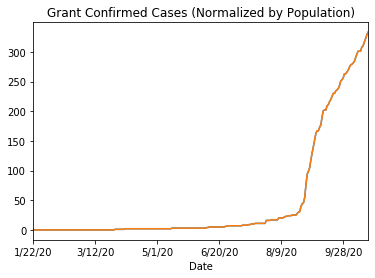

In [167]:
Grant_confirmed_daily_norm['Cases per 10000'].plot(title='Grant Confirmed Cases (Normalized by Population)').get_figure().savefig('Grant_confirmed_norm.png')
Grant_confirmed_daily_norm['Cases per 10000'].plot(title='Grant Confirmed Cases (Normalized by Population)')

#### Grant Deaths normalized by population (per 10000)

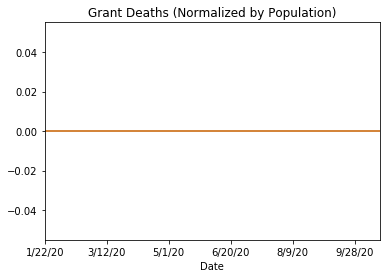

In [67]:
Grant_death_daily_norm['Cases per 10000'].plot(title='Grant Deaths (Normalized by Population)').get_figure().savefig('Grant_death_norm')
Grant_death_daily_norm['Cases per 10000'].plot(title='Grant Deaths (Normalized by Population)')

#### Grant New Cases normalized by population

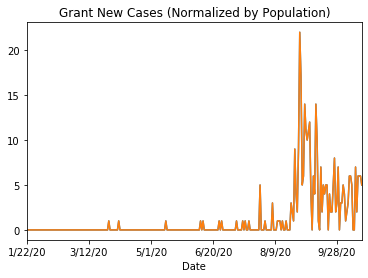

In [69]:
Grant_confirmed_daily_norm['New Cases'].plot(title='Grant New Cases (Normalized by Population)').get_figure().savefig('Grant_new_norm.png')
Grant_confirmed_daily_norm['New Cases'].plot(title='Grant New Cases (Normalized by Population)')

### Task 2

#### Part 1 Fit a distribution to the number of cases in Washington

#### Because we are dealing with discrete events over an interval of time, the Poisson Distribution can be used.


Washington Total Cases Poisson Distribution


[]

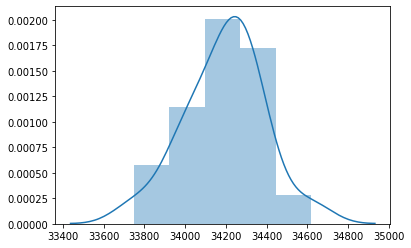

In [198]:
data = WA_confirmed_daily['Confirmed Cases'].mean()
WA_confirmed_cases_poisson = poisson.rvs(mu=data, size=20)
WA_confirmed_cases_plot = sns.distplot(WA_confirmed_cases_poisson)
print("Washington Total Cases Poisson Distribution")
WA_confirmed_cases_plot.plot()


### Part 2 Model a Poisson Distribution over Washington and 5 other states

#### Washington Confirmed Cases Poisson Distribution

Washington Confirmed Cases per 100,000 Poisson Distribution


[]

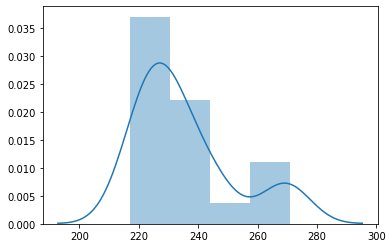

In [196]:
WA_confirmed_mean
WA_confirmed_poisson = poisson.rvs(mu=WA_confirmed_mean, size=20)
WA_confirmed_plot = sns.distplot(WA_poisson)
print("Washington Confirmed Cases per 100,000 Poisson Distribution")
WA_plot.plot()

#### Washington Deaths Poisson Distribution

Washington Deaths per 100,000 Poisson Distribution


[]

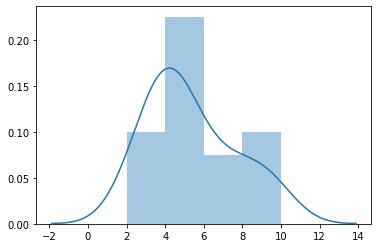

In [195]:
WA_death_mean
WA_death_poisson = poisson.rvs(mu=WA_death_mean, size=20)
WA_death_plot = sns.distplot(WA_death_poisson)
print("Washington Deaths per 100,000 Poisson Distribution")
WA_death_plot.plot()


#### Massachusetts Confirmed Cases Poisson Distribution

Massachusetts Confirmed Cases per 100,000 Poisson Distribution


[]

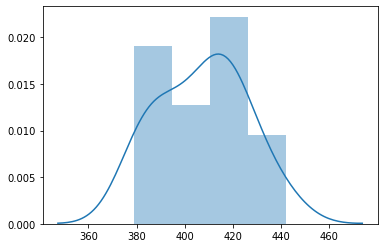

In [199]:
MA_confirmed_mean
MA_confirmed_poisson = poisson.rvs(mu=MA_confirmed_mean, size=20)
MA_confirmed_plot = sns.distplot(MA_confirmed_poisson)
print("Massachusetts Confirmed Cases per 100,000 Poisson Distribution")
MA_confirmed_plot.plot()

#### Massachusetts Deaths Poisson Distribution

Massachusetts Deaths per 100,000 Poisson Distribution


[]

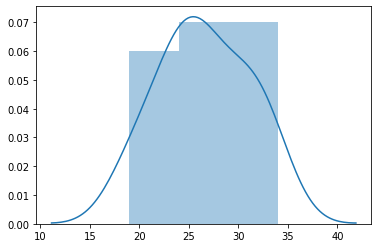

In [200]:
MA_death_mean
MA_death_poisson = poisson.rvs(mu=MA_death_mean, size=20)
MA_death_plot = sns.distplot(MA_death_poisson)
print("Massachusetts Deaths per 100,000 Poisson Distribution")
MA_death_plot.plot()

#### New Jersey Confirmed Cases Poisson Distribution

New Jersey Confirmed Cases per 100,000 Poisson Distribution


[]

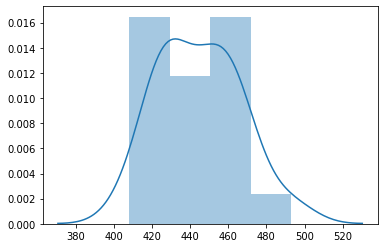

In [201]:
NJ_confirmed_mean
NJ_confirmed_poisson = poisson.rvs(mu=NJ_confirmed_mean, size=20)
NJ_confirmed_plot = sns.distplot(NJ_confirmed_poisson)
print("New Jersey Confirmed Cases per 100,000 Poisson Distribution")
NJ_confirmed_plot.plot()

#### New Jersey Deaths Poisson Distribution

New Jersey Deaths per 100,000 Poisson Distribution


[]

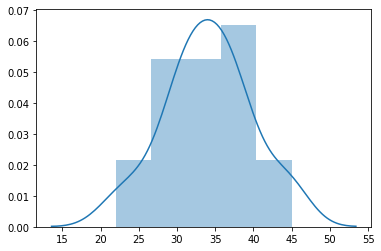

In [202]:
NJ_death_mean
NJ_death_poisson = poisson.rvs(mu=NJ_death_mean, size=20)
NJ_death_plot = sns.distplot(NJ_death_poisson)
print("New Jersey Deaths per 100,000 Poisson Distribution")
NJ_death_plot.plot()

#### Arizona Confirmed Cases Poisson Distribution

Arizona Confirmed Cases per 100,000 Poisson Distribution


[]

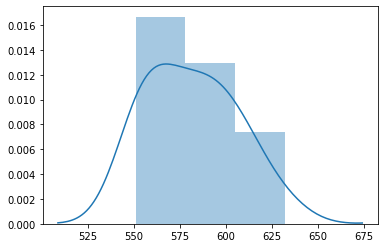

In [203]:
AZ_confirmed_mean
AZ_confirmed_poisson = poisson.rvs(mu=AZ_confirmed_mean, size=20)
AZ_confirmed_plot = sns.distplot(AZ_confirmed_poisson)
print("Arizona Confirmed Cases per 100,000 Poisson Distribution")
AZ_confirmed_plot.plot()

#### Arizona Deaths Poisson Distribution

Arizona Deaths per 100,000 Poisson Distribution


[]

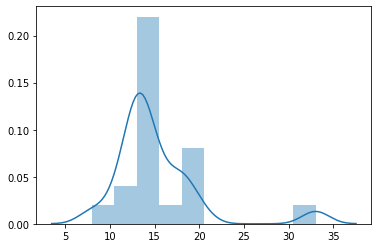

In [204]:
AZ_death_mean
AZ_death_poisson = poisson.rvs(mu=AZ_death_mean, size=20)
AZ_death_plot = sns.distplot(AZ_death_poisson)
print("Arizona Deaths per 100,000 Poisson Distribution")
AZ_death_plot.plot()

#### Virginia Confirmed Cases Poisson Distribution

Virginia Confirmed Cases per 100,000 Poisson Distribution


[]

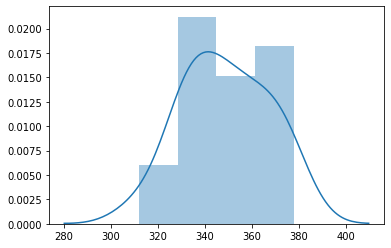

In [205]:
VA_confirmed_mean
VA_confirmed_poisson = poisson.rvs(mu=VA_confirmed_mean, size=20)
VA_confirmed_plot = sns.distplot(VA_confirmed_poisson)
print("Virginia Confirmed Cases per 100,000 Poisson Distribution")
VA_confirmed_plot.plot()

#### Virginia Deaths Poisson Distribution

Virginia Deaths per 100,000 Poisson Distribution


[]

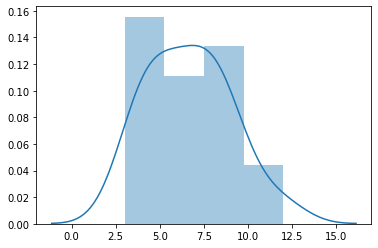

In [206]:
VA_death_mean
VA_death_poisson = poisson.rvs(mu=VA_death_mean, size=20)
VA_death_plot = sns.distplot(VA_death_poisson)
print("Virginia Deaths per 100,000 Poisson Distribution")
VA_death_plot.plot()

#### Tennessee Confirmed Cases Poisson Distributions

Tennessee Confirmed Cases per 100,000 Poisson Distribution


[]

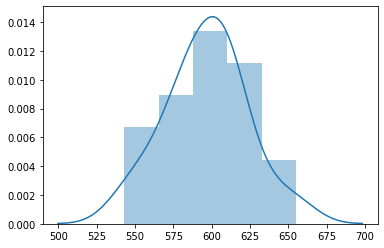

In [207]:
TN_confirmed_mean
TN_confirmed_poisson = poisson.rvs(mu=TN_confirmed_mean, size=20)
TN_confirmed_plot = sns.distplot(TN_confirmed_poisson)
print("Tennessee Confirmed Cases per 100,000 Poisson Distribution")
TN_confirmed_plot.plot()

#### Tennessee Deaths Poisson Distribution

Tennessee Deaths per 100,000 Poisson Distribution


[]

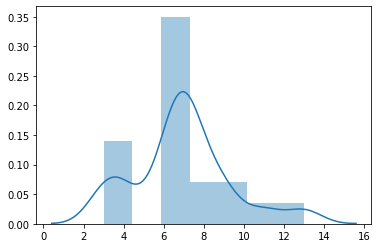

In [209]:
TN_death_mean
TN_death_poisson = poisson.rvs(mu=VA_death_mean, size=20)
TN_death_plot = sns.distplot(TN_death_poisson)
print("Tennessee Deaths per 100,000 Poisson Distribution")
TN_death_plot.plot()

### Part 5 Perform Correlation using Enrichment Data

In [250]:
WA_enrichment_data=enrichment_data[enrichment_data['State'] == 'WA']
WA_enrichment_data.head()

,Unnamed: 0,countyFIPS_x,County Name,State,population,stateFIPS,confirmed_1/22/20,confirmed_1/23/20,confirmed_1/24/20,confirmed_1/25/20,...,20 or more units,Mobile homes,1 room,4 rooms,9 rooms or more,Average household size -- Owner-occupied,Average household size -- Renter-occupied,Owner-occupied value value: Median (dollars),Housing unit with mortgage: Median (dollars),Housing unit paying rent: Median (dollars)
2985,2985,0,Statewide Unallocated,WA,0,53,0,0,0,0,...,365,4235,483,3764,2970,2.57,2.35,187000,1255,673
2986,2986,53001,Adams County,WA,19983,53,0,0,0,0,...,6309,10590,1706,17182,12910,2.56,2.42,271300,1730,1192
2987,2987,53003,Asotin County,WA,22582,53,0,0,0,0,...,0,313,16,322,326,2.23,2.33,207000,1417,721
2988,2988,53005,Benton County,WA,204390,53,0,0,0,0,...,1451,1714,677,3727,3771,2.56,2.29,209800,1419,893
2989,2989,53007,Chelan County,WA,77200,53,0,0,0,0,...,8550,6517,3425,16908,9639,2.58,2.34,318400,1664,1015


In [291]:
WA_enrichmentdata = WA_enrichment_data[['County Name', 'State', 'Total Housing Units', 'Occupied housing units', 'Occupied housing units', 'Vacant housing units','Homeowner vacancy rate','Rental vacancy rate','1-unit, detached','1-unit, attached', '5 to 9 units','20 or more units', 'Mobile homes','1 room', '4 rooms','9 rooms or more','Average household size -- Owner-occupied', 'Average household size -- Renter-occupied','Owner-occupied value value: Median (dollars)','Housing unit with mortgage: Median (dollars)','Housing unit paying rent: Median (dollars)']]
WA_correlation_data=WA_enrichment_data.filter(['County Name', 'population', 'confirmed_9/19/20','Occupied housing units', 'Average household size -- Owner-occupied', 'Owner-occupied value value: Median (dollars)'])
WA_correlation_data.rename(columns={'confirmed_9/19/20': 'Total Cases'}, inplace=True)
WA_correlation_data.sort_values('Total Cases', ascending=False).head()

,County Name,population,Total Cases,Occupied housing units,Average household size -- Owner-occupied,Owner-occupied value value: Median (dollars)
3002,King County,2252782,21388,2670,2.51,91300
3024,Yakima County,250873,11260,7166,2.45,179800
3012,Pierce County,904980,7519,6577,2.45,104800
3016,Snohomish County,822083,6675,22942,2.41,112800
3017,Spokane County,522798,6175,12232,2.58,103300


In [292]:
WA_correlation_data.corr()

,population,Total Cases,Occupied housing units
population,1.000000,0.903213,-0.084315
Total Cases,0.903213,1.000000,-0.131383
Occupied housing units,-0.084315,-0.131383,1.000000


### Part 5 Hypothesis

#### My hypothesis is that Covid struck the hardest in poor areas. This is based on value of home and occupied housing units versus population. The median value of a home in King County is only 91,000 dollars. Also, with a population over 225,000, there are only 2670 occupied housing units. This seems very low. Though the actual average household size is small, I believe that this is an indicator of the low income of the area and that low income correlates with the impact of Covid in the area.